#  원근 변환(Perspective Transform) : 원근 이미지<-> 평면 이미지

스마트폰으로 문서를 찍으면 주변이 삐둘거리거나 사다리꼴형으로 되는데 이런 이미지를 직사각형으로 펼치는 방법

https://bkshin.tistory.com/entry/OpenCV-14-%EC%9D%B4%EB%AF%B8%EC%A7%80-%EB%92%A4%ED%8B%80%EA%B8%B0%EC%96%B4%ED%95%80-%EB%B3%80%ED%99%98-%EC%9B%90%EA%B7%BC-%EB%B3%80%ED%99%98

원근 변환은 이미지를 3차원으로 변환 - 원근법의 원리를 적용해 변환
- 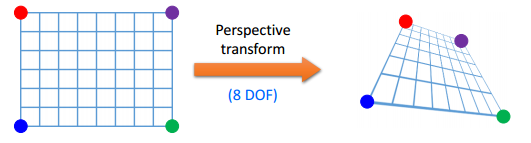

- 변환 행렬 계산 → 변환 적용"이라는 2단계 구조
    - mtrx = cv2.getPerspectiveTransform(pts1, pts2)
        - pts1: 변환 이전 영상의 좌표 4개, 4 x 2 배열
        - pts2: 변환 이후 영상의 좌표 4개, 4 x 2 배열
        - mtrx: 변환행렬 반환, 3 x 3 행렬
        
    - dst = cv2.warpAffine(img, mtrx, size)

### 1) 사다리꼴 이미지 펼치기
<img src='../cv_images/newspaper_1.png'>

In [1]:
import cv2
import numpy as np

file_name = '../cv_images/newspaper.jpg'
img = cv2.imread(file_name)

width, height = 640, 240 # 가로, 세로 크기

#---① 원근 변환 전 후 4개 좌표
# 좌상, 우상,우하, 좌하 네개의 점 지정
src = np.array([[511,352],[1008, 345],[1122, 584],[455,594]], dtype=np.float32) # input 지점 4개
dst = np.array([[0,0],[width, 0],[width, height],[0,height]], dtype=np.float32)

#---② 원근 변환 행렬 계산 - src 영역를 dst영역으로 바꾸기 위한 변환 행렬을 얻어옴
matrix = cv2.getPerspectiveTransform(src, dst)  # 코드입력          # Mattrix 얻어옴

# #---③ 원근 변환 적용 - warpPerspective() : 변환행렬값을 적용해 최종 이미지를 얻어옴
result = cv2.warpPerspective(img, matrix, (width, height))  # 코드입력    # Matrix대로 변환을 함

cv2.imshow('img', img)
cv2.imshow('result', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 2) 회전된 이미지 올바로 세우기
<img src='../cv_images/poker_1.png'>

In [2]:
import cv2
import numpy as np

file_name = '../cv_images/poker.jpg'
img = cv2.imread(file_name)

width, height = 530, 710 # 가로, 세로 크기

#---① 원근 변환 전 후 4개 좌표
# 좌상, 우상,우하, 좌하 네개의 점 지정
src = np.array([[702, 143],[1133, 414],[726, 1007],[276, 700]], dtype=np.float32) # input 지점 4개
dst = np.array([[0,0],[width, 0],[width, height],[0,height]], dtype=np.float32)

#---② 원근 변환 행렬 계산
matrix = cv2.getPerspectiveTransform(src, dst) #Mattrix 얻어옴

#---③ 원근 변환 적용
result = cv2.warpPerspective(img, matrix, (width, height)) # Matrix대로 변환을 함

cv2.imshow('img', img)
cv2.imshow('result', result)
cv2.waitKey(0)
cv2.destroyAllWindows()